# Explore here

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from pickle import dump

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

save_path = r"D:\01A-TRABAJO\PYTHON\DATASCIENCE\EJERCICIOS\UNSUPERVISEDLEARNING\UNSUPERVISEDLEARNING\data\raw\kmeans.csv" 

# We save the csv file
df.to_csv(save_path, index=False)

We check the data to get a view of how it is looking like.

In [3]:
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


Our goal is to be able to classify houses according to their region and median income.

In [5]:
# We will only keep the columns that are relevant to our goal.
X = df[["MedInc", "Latitude", "Longitude"]]

In [6]:
# We check the X data is as we expected, and see the shape of the dataframe.
print(X)

       MedInc  Latitude  Longitude
0      8.3252     37.88    -122.23
1      8.3014     37.86    -122.22
2      7.2574     37.85    -122.24
3      5.6431     37.85    -122.25
4      3.8462     37.85    -122.25
...       ...       ...        ...
20635  1.5603     39.48    -121.09
20636  2.5568     39.49    -121.21
20637  1.7000     39.43    -121.22
20638  1.8672     39.43    -121.32
20639  2.3886     39.37    -121.24

[20640 rows x 3 columns]


We will begin to set aside some data for testing and training.

In [7]:
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)

In [8]:
# We confirm with the shape the size of the training dataset.
X_train.shape

(16512, 3)

To obtain our result we will use the K-Means model and classify the data into 6 clusters and plot it to then predict and train a supervised classification model.

In [9]:
# We build the K-means with 6 clusters
model_6kmeans = KMeans(n_clusters = 6, n_init = "auto", random_state = 42)
model_6kmeans.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [10]:
# We insert the training data into the clusters
y_train = list(model_6kmeans.labels_)
X_train["cluster"] = y_train
X_train.head()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


We scatterplot the clusters

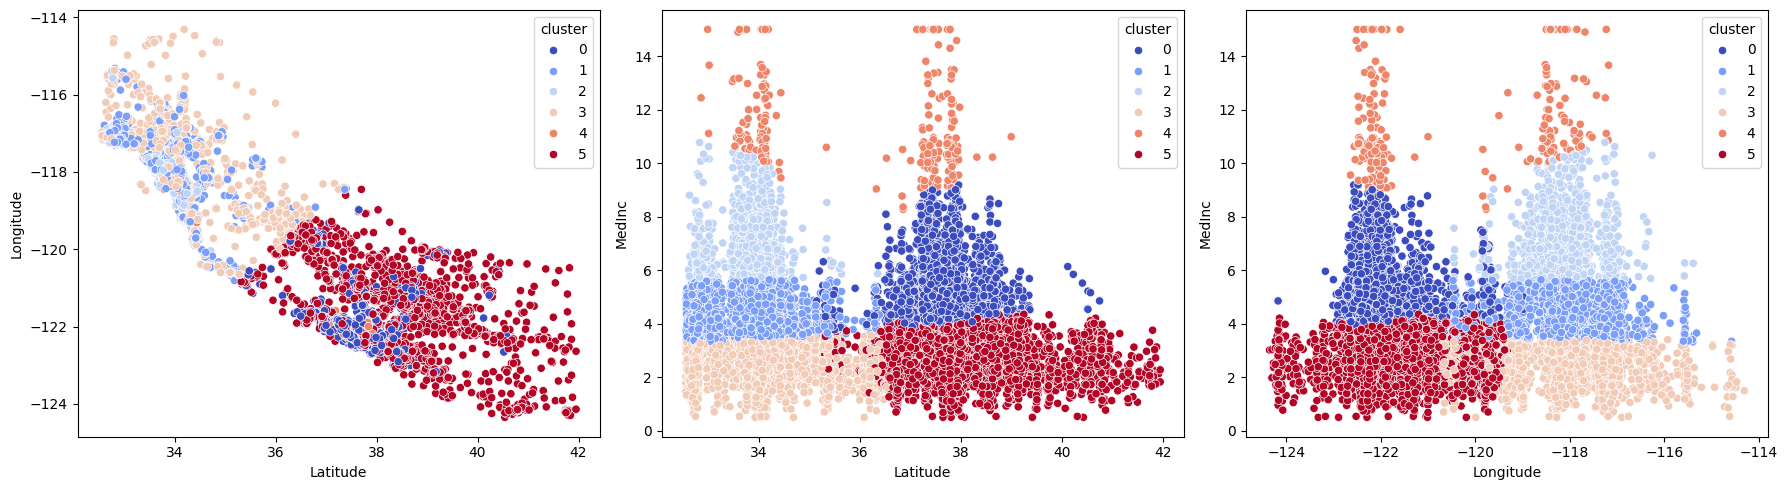

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Scatter plot for Latitude vs Longitude
sns.scatterplot(data=X_train, x='Latitude', y='Longitude', hue='cluster', ax=axes[0], palette='coolwarm')

# Scatter plot for Latitude vs MedInc
sns.scatterplot(data=X_train, x='Latitude', y='MedInc', hue='cluster', ax=axes[1], palette='coolwarm')

# Scatter plot for Longitude vs MedInc
sns.scatterplot(data=X_train, x='Longitude', y='MedInc', hue='cluster', ax=axes[2], palette='coolwarm')

plt.tight_layout()
plt.show()

We will now predict with our test set to compare the results

In [12]:
y_test = list(model_6kmeans.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


We will display the predicted clusters with "x" with the colour of the cluster they are predicted to be part of and we will place it over the previously 

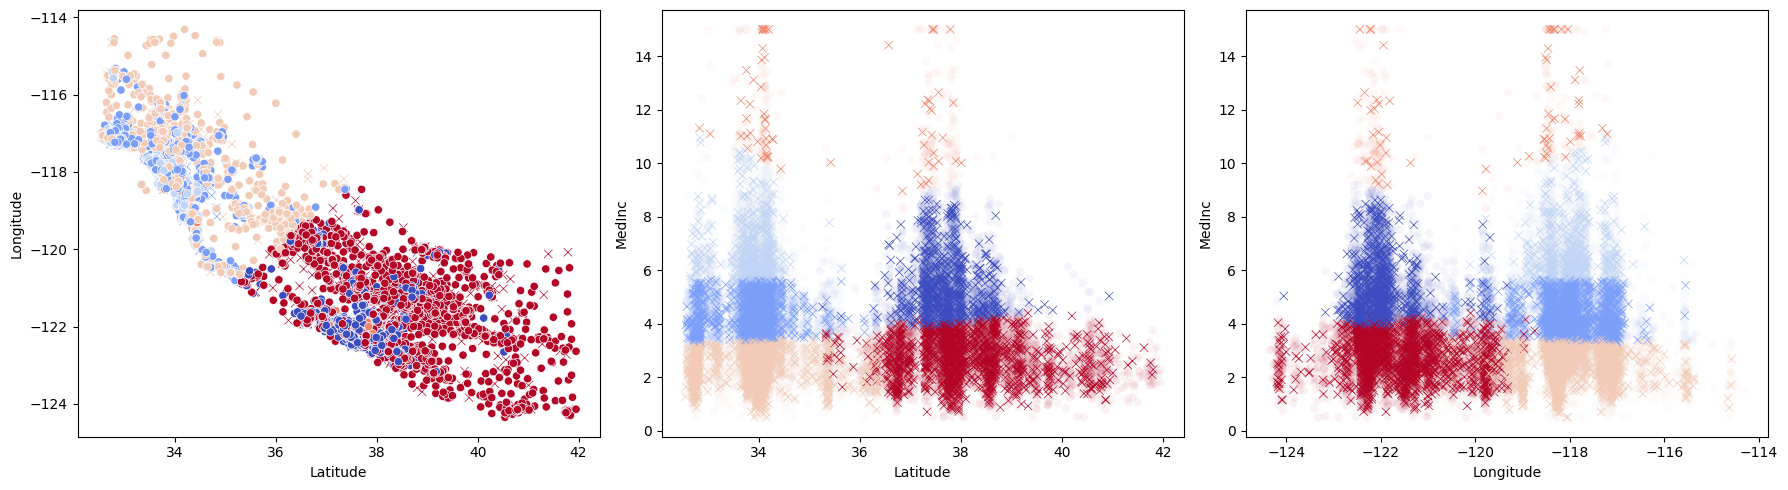

In [13]:
fig, axes = plt.subplots(1, 3, figsize = (18, 5))

sns.scatterplot(data = X_train, x = "Latitude", y = "Longitude", hue = "cluster",ax=axes[0], palette = "coolwarm", alpha = 0.05)
sns.scatterplot( data = X_train, x = "Latitude", y = "MedInc", hue = "cluster",ax=axes[1], palette = "coolwarm", alpha = 0.05)
sns.scatterplot( data = X_train, x = "Longitude", y = "MedInc", hue = "cluster",ax=axes[2], palette = "coolwarm", alpha = 0.05)

sns.scatterplot(data = X_test, x = "Latitude", y = "Longitude", hue = "cluster",ax = axes[0], palette = "coolwarm", marker = "x")
sns.scatterplot(data = X_test, x = "Latitude", y = "MedInc", hue = "cluster",ax = axes[1], palette = "coolwarm", marker = "x")
sns.scatterplot( data = X_test, x = "Longitude", y = "MedInc", hue = "cluster",ax = axes[2], palette = "coolwarm", marker = "x")

plt.tight_layout()

sns.scatterplot(data=X_train, x='Latitude', y='Longitude', hue='cluster', ax=axes[0], palette='coolwarm')


for ax in axes:
    ax.legend([],[], frameon=False)

plt.show()

We will now train a Decision Tree Classifier    

In [14]:
X_train_dt = X_train.drop('cluster', axis=1)
X_test_dt = X_test.drop('cluster', axis=1)

In [15]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_dt, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
y_pred = dt_classifier.predict(X_test_dt)

In [17]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       561
           1       1.00      0.99      1.00       983
           2       1.00      0.99      0.99       299
           3       0.99      1.00      1.00      1111
           4       0.94      0.98      0.96        62
           5       1.00      1.00      1.00      1112

    accuracy                           1.00      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       1.00      1.00      1.00      4128



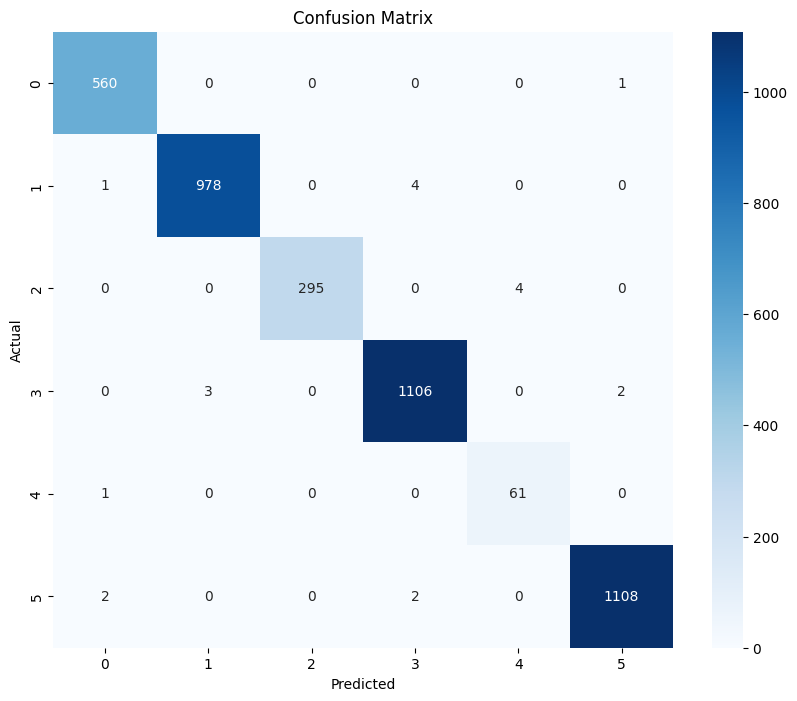

In [18]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)}')

The accuracy score is: 0.9951550387596899


We can see that most of the data has been classified correctly, for they are almost all of them in their diagonal (Diagonal predictions are correct classification)

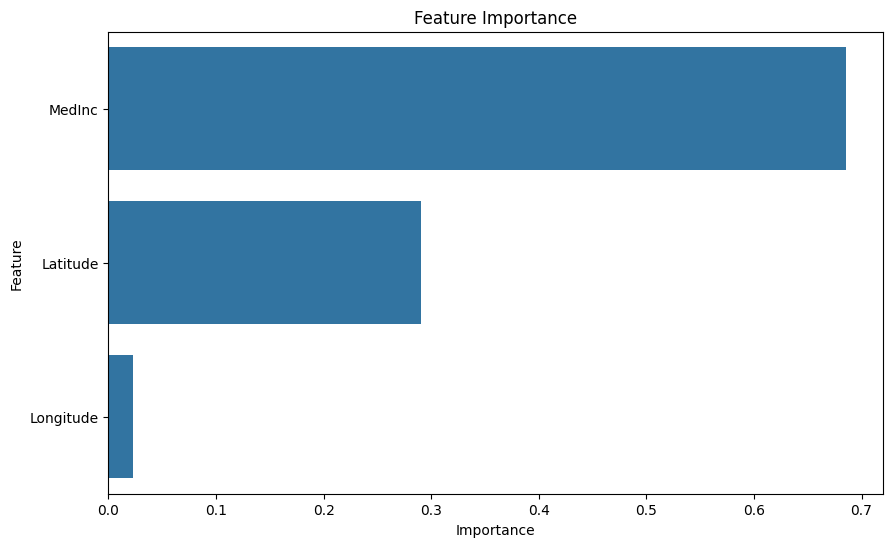

In [20]:
# We check the feature importance
feature_importance = pd.DataFrame({'feature': X_train_dt.columns, 'importance': dt_classifier.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

We can see how mostly the Medinc is the feature that greatly influences to determine the cluster.

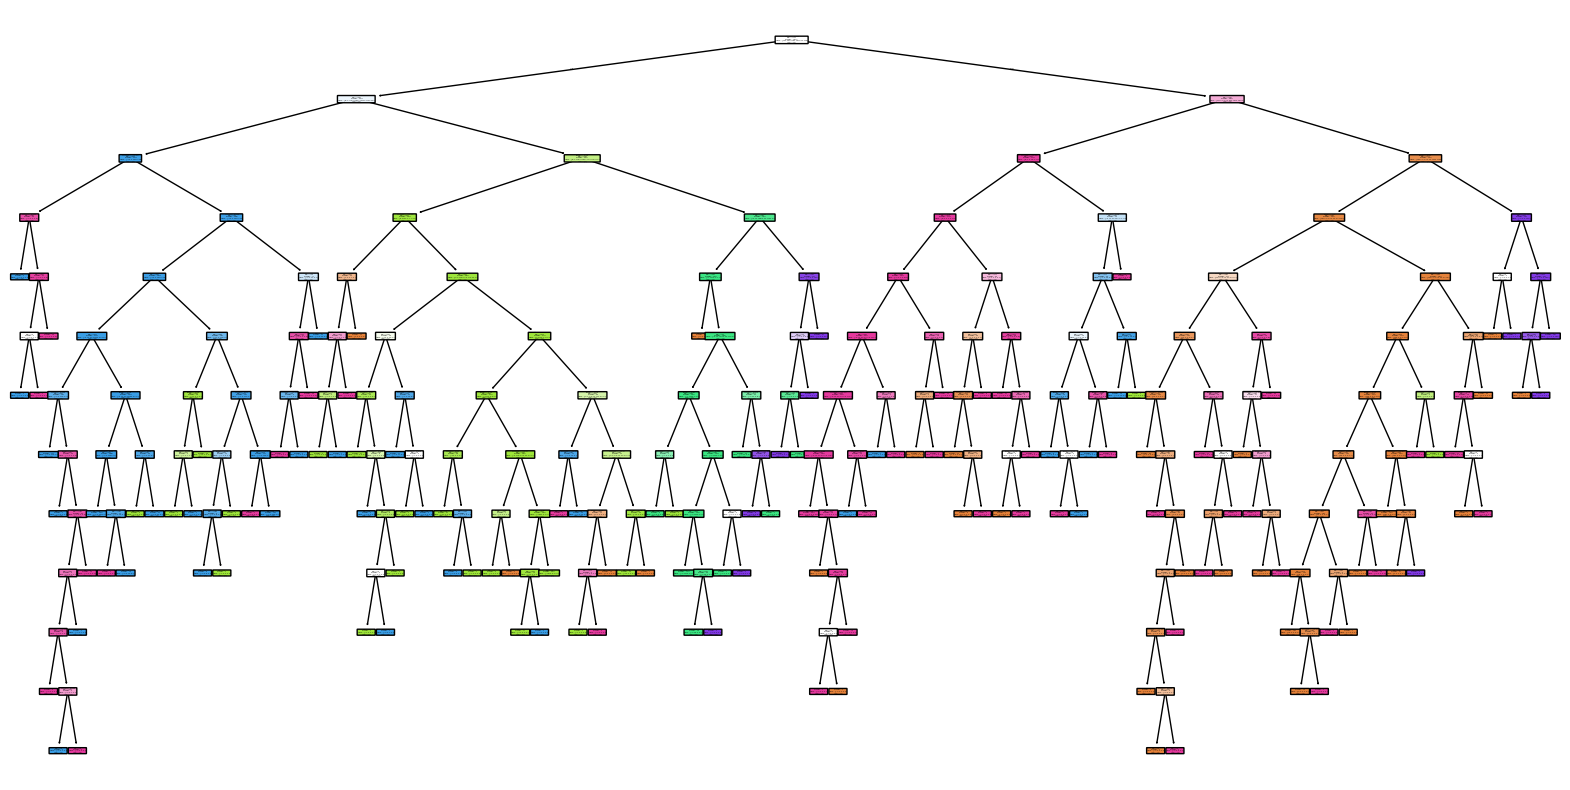

In [21]:
# We will now plot the tree we used to make the predictions.
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=X_train_dt.columns, class_names=True, filled=True, rounded=True)
plt.show()

We will now compare the results from the 6kmeans model and the decisiontree model   

Adjusted Rand Index: 0.9892
Normalized Mutual Information: 0.9800


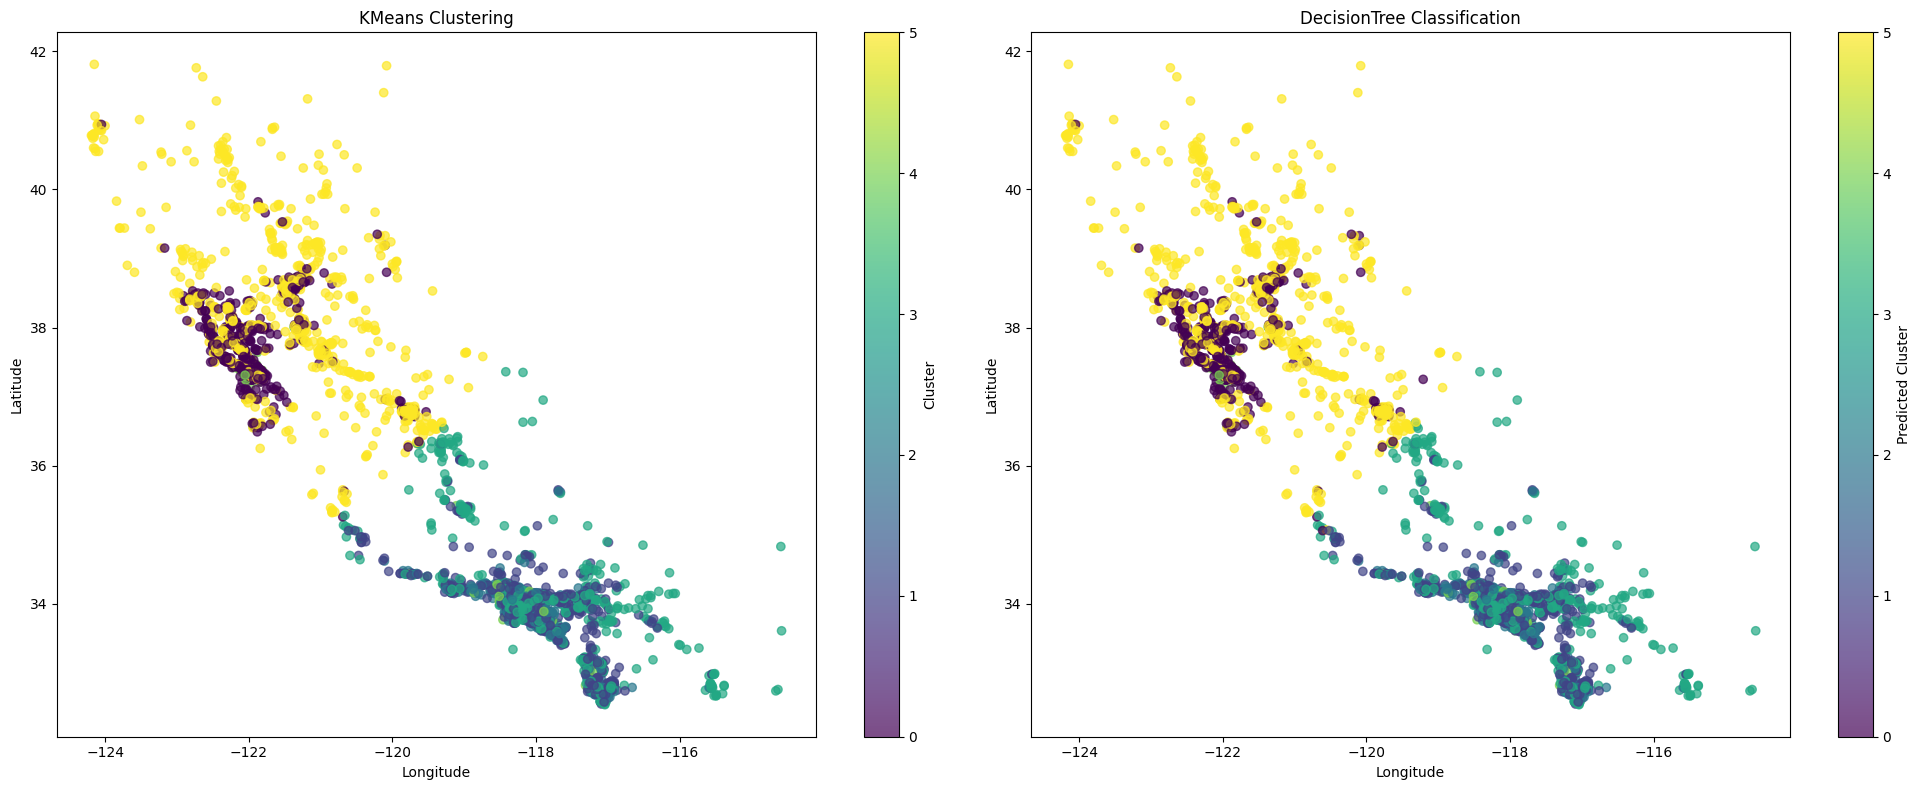

In [22]:
# Calculate agreement metrics
ari_score = adjusted_rand_score(y_test, y_pred)
nmi_score = normalized_mutual_info_score(y_test, y_pred)

print(f"Adjusted Rand Index: {ari_score:.4f}")
print(f"Normalized Mutual Information: {nmi_score:.4f}")

# Visualize clustering results side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# KMeans results
scatter1 = ax1.scatter(X_test['Longitude'], X_test['Latitude'], c=y_test, cmap='viridis', alpha=0.7)
ax1.set_title('KMeans Clustering')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
plt.colorbar(scatter1, ax=ax1, label='Cluster')

# DecisionTree results
scatter2 = ax2.scatter(X_test['Longitude'], X_test['Latitude'], c=y_pred, cmap='viridis', alpha=0.7)
ax2.set_title('DecisionTree Classification')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
plt.colorbar(scatter2, ax=ax2, label='Predicted Cluster')

plt.tight_layout()
plt.show()


In [27]:
# Analyze misclassifications
X_test_reset = X_test.reset_index(drop=True)
y_test_series = pd.Series(y_test)
y_pred_series = pd.Series(y_pred)

misclassified_mask = y_test_series != y_pred_series
misclassified = X_test_reset[misclassified_mask].copy()
misclassified['KMeans_Cluster'] = y_test_series[misclassified_mask]
misclassified['DT_Predicted_Cluster'] = y_pred_series[misclassified_mask]

print("Sample of Misclassified Instances:")
print(misclassified.head())

Sample of Misclassified Instances:
       MedInc  Latitude  Longitude  cluster  KMeans_Cluster  \
167    3.0156     36.57    -119.30        5               5   
411   10.3682     33.61    -117.92        2               2   
550    3.3333     33.67    -116.31        3               3   
1102   8.9669     36.84    -119.85        4               4   
1146   3.4740     34.89    -116.99        1               1   

      DT_Predicted_Cluster  
167                      3  
411                      4  
550                      1  
1102                     0  
1146                     3  


The DecisionTreeClassifier has achieved an exceptional 99% accuracy in replicating the KMeans clustering results, indicating very clear and stable patterns in the housing data. The selected features (MedInc, Latitude, Longitude) prove highly informative for both clustering and classification. While this high agreement validates the KMeans clustering and demonstrates the relevance of the chosen features, it also raises a potential concern about overfitting. The DecisionTree's ability to so closely mirror the unsupervised KMeans results suggests extremely distinct data patterns but may require further investigation to ensure generalizability.

We will proceed to save both models.

In [29]:
dump(model_6kmeans, open(r"D:\01A-TRABAJO\PYTHON\DATASCIENCE\EJERCICIOS\UNSUPERVISEDLEARNING\UNSUPERVISEDLEARNING\models\kmeans.sav", "wb"))
dump(dt_classifier, open(r"D:\01A-TRABAJO\PYTHON\DATASCIENCE\EJERCICIOS\UNSUPERVISEDLEARNING\UNSUPERVISEDLEARNING\models\decision_tree_classifier.sav", "wb"))